# CODE_2

## Target:
* trying the best architecture with least parameters and not sacrificying the accuracy much 
## Results:
* Model Parameters : 7,902
* Best Training accuracy : 98.53
* Best Testing accuracy : 98.44
## Analysis:
* Model is overfitting. 
* test accuracy saturated. improvement can be adding transforms so that model can learn new structures

CUDA Available? True


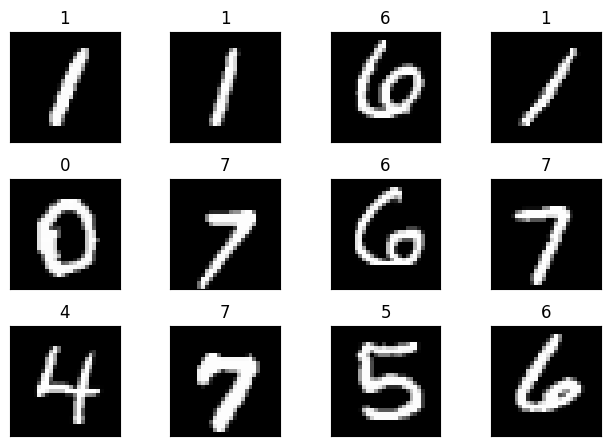

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)
# Train data transformations

train_transforms = transforms.Compose([
    # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # transforms.Resize((28, 28)),
    # transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [2]:
!pip install torchsummary
from model import Net2, train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net2().to(device)
model_summary(model, (1,28,28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             584
              ReLU-6            [-1, 8, 28, 28]               0
       BatchNorm2d-7            [-1, 8, 28, 28]              16
           Dropout-8            [-1, 8, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]           1,168
             ReLU-10           [-1, 16, 28, 28]               0
      BatchNorm2d-11           [-1, 16, 28, 28]              32
          Dropout-12           [-1, 16, 28, 28]               0
    

In [3]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader)
  # scheduler.step()

Loss=1.0981184244155884 Batch_id=117 Accuracy=44.62: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]



Test set: Average loss: 1.1042, Accuracy: 6675/10000 (66.75%)



Loss=0.3218710720539093 Batch_id=117 Accuracy=89.13: 100%|██████████| 118/118 [00:16<00:00,  7.33it/s]



Test set: Average loss: 0.3931, Accuracy: 8991/10000 (89.91%)



Loss=0.12472046166658401 Batch_id=117 Accuracy=95.18: 100%|██████████| 118/118 [00:16<00:00,  7.04it/s]



Test set: Average loss: 0.2469, Accuracy: 9332/10000 (93.32%)



Loss=0.10167005658149719 Batch_id=117 Accuracy=96.48: 100%|██████████| 118/118 [00:15<00:00,  7.51it/s]



Test set: Average loss: 0.1420, Accuracy: 9618/10000 (96.18%)



Loss=0.1294909566640854 Batch_id=117 Accuracy=97.17: 100%|██████████| 118/118 [00:17<00:00,  6.85it/s]



Test set: Average loss: 0.1061, Accuracy: 9721/10000 (97.21%)



Loss=0.08440478891134262 Batch_id=117 Accuracy=97.54: 100%|██████████| 118/118 [00:16<00:00,  7.37it/s]



Test set: Average loss: 0.0813, Accuracy: 9787/10000 (97.87%)



Loss=0.11020705848932266 Batch_id=117 Accuracy=97.84: 100%|██████████| 118/118 [00:15<00:00,  7.61it/s]



Test set: Average loss: 0.0833, Accuracy: 9778/10000 (97.78%)



Loss=0.0750037208199501 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [00:15<00:00,  7.54it/s]



Test set: Average loss: 0.0785, Accuracy: 9772/10000 (97.72%)



Loss=0.08075378835201263 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [00:15<00:00,  7.84it/s]



Test set: Average loss: 0.0550, Accuracy: 9853/10000 (98.53%)



Loss=0.025654122233390808 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:15<00:00,  7.83it/s]



Test set: Average loss: 0.0656, Accuracy: 9812/10000 (98.12%)



Loss=0.07886628806591034 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [00:14<00:00,  7.96it/s]



Test set: Average loss: 0.0585, Accuracy: 9827/10000 (98.27%)



Loss=0.09439980983734131 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [00:14<00:00,  7.98it/s]



Test set: Average loss: 0.0541, Accuracy: 9835/10000 (98.35%)



Loss=0.056162845343351364 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:15<00:00,  7.75it/s]



Test set: Average loss: 0.0616, Accuracy: 9819/10000 (98.19%)



Loss=0.050730302929878235 Batch_id=117 Accuracy=98.54: 100%|██████████| 118/118 [00:15<00:00,  7.86it/s]



Test set: Average loss: 0.0524, Accuracy: 9841/10000 (98.41%)



Loss=0.03160296007990837 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:14<00:00,  7.97it/s]



Test set: Average loss: 0.0499, Accuracy: 9844/10000 (98.44%)

